#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Tema 2.1 Agrupamiento / Clustering jerarquico o aglomerativo (Ejemplo 2) Alumno: Ibarra Ramírez Sergio </font>

Vamos a importar las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Importamos la data necesaria para aplicar el algoritmo de Cluster jerarquico 

In [2]:
dataset = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/Mall_Customers.csv')
dataset.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


Vamos a usar solamente ingreso anual y score como variables para generar nuestros clusters  

In [9]:
X = dataset.iloc[:,[3,4]].values
X

AttributeError: 'numpy.ndarray' object has no attribute 'head'

Vamos a crear el dendograma 

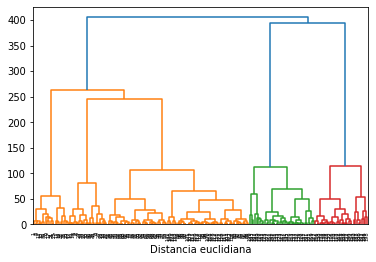

In [5]:
import scipy.cluster.hierarchy as sch 
dend = sch.dendrogram(sch.linkage(X,method='ward'))
plt.xlabel('Clientes')
plt.xlabel('Distancia euclidiana')
plt.show()

En este caso 5 clusters parece ser un número adecuado de separación en clusters

In [7]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_ac = ac.fit_predict(X)
print(y_ac)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Vamos a graficar el reusltado de agrupamiento en el n_clusters definido por el algoritmo aglomerativo y los puntos 

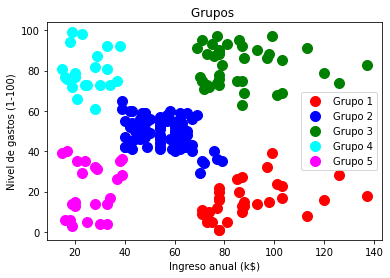

In [8]:
# Graficando los resultados
plt.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(X[y_ac == 2, 0], X[y_ac == 2, 1], s = 100, c = 'green', label = 'Grupo 3')
plt.scatter(X[y_ac == 3, 0], X[y_ac == 3, 1], s = 100, c = 'cyan', label = 'Grupo 4')
plt.scatter(X[y_ac == 4, 0], X[y_ac == 4, 1], s = 100, c = 'magenta', label = 'Grupo 5')
plt.title('Grupos ')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Nivel de gastos (1-100)')
plt.legend()
plt.show()

Vamos a normalizar los datos para tener una misma escala 

In [12]:
from numpy.linalg import norm
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled



array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

In [15]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data.scaled.head(4)

AttributeError: 'DataFrame' object has no attribute 'scaled'

Vamos a graficar el dendograma 

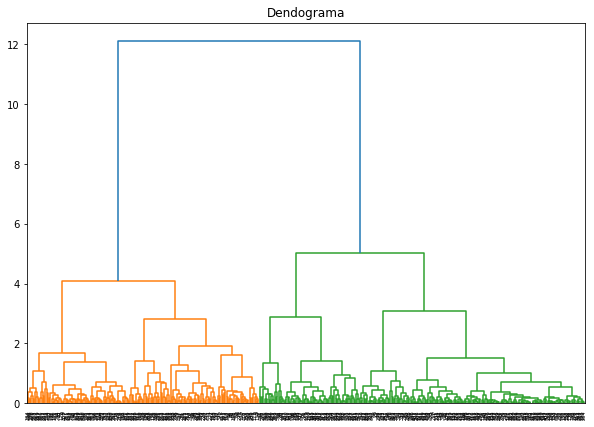

In [13]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = sch.dendrogram(sch.linkage(data_scaled,method='ward'))

Ahora vamos a usar el n_clusters 'optimo' que se obtuvo del dendograma para asignar a cada uno de nuestros puntos a uno u otro cluster 

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

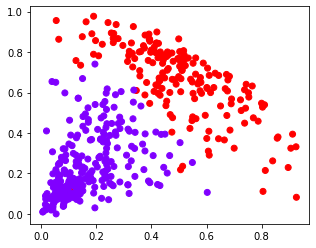

In [22]:
plt.figure(figsize=(5,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c= cluster.labels_, cmap='rainbow')